<a href="https://colab.research.google.com/github/bchiramani/sales-prediction-mini-project/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STORE SALES
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

### Files
* train.csv - historical data including Sales 
* test.csv - historical data excluding Sales 
* sample_submission.csv - a sample submission file in the correct format 
* store.csv - supplemental information about the stores

### Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* DayOfWeek - indicates in which day the sales took place 
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* Promo - indicates whether a store is running a promo on that day
* 
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Imports

In [131]:
# Loading packages 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import datetime as dt # for date and time manipulation

### Data loading

In [132]:
# Loading dataset train, test and store
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')


<ipython-input-132-5de3b5312265>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('/content/train.csv')


# Data Exploration

In [133]:
# Looking into each dataset size
print('training dataset shape',train.shape)
print('testing dataset shape',test.shape)
print('store dataset shape',store.shape)

training dataset shape (1017209, 9)
testing dataset shape (41088, 8)
store dataset shape (1115, 10)


In [134]:
# Train dataset
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [135]:
# Some infos of the trainset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [136]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [137]:
# Test dataset
test.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [138]:
# Store dataset
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [139]:
print('Stores having 0 sales : ', len(train[train['Sales']<=0]))

Stores having 0 sales :  172871


### Store feature

In [140]:
print(len(train))
print(len(train['Store'].unique()))

1017209
1115


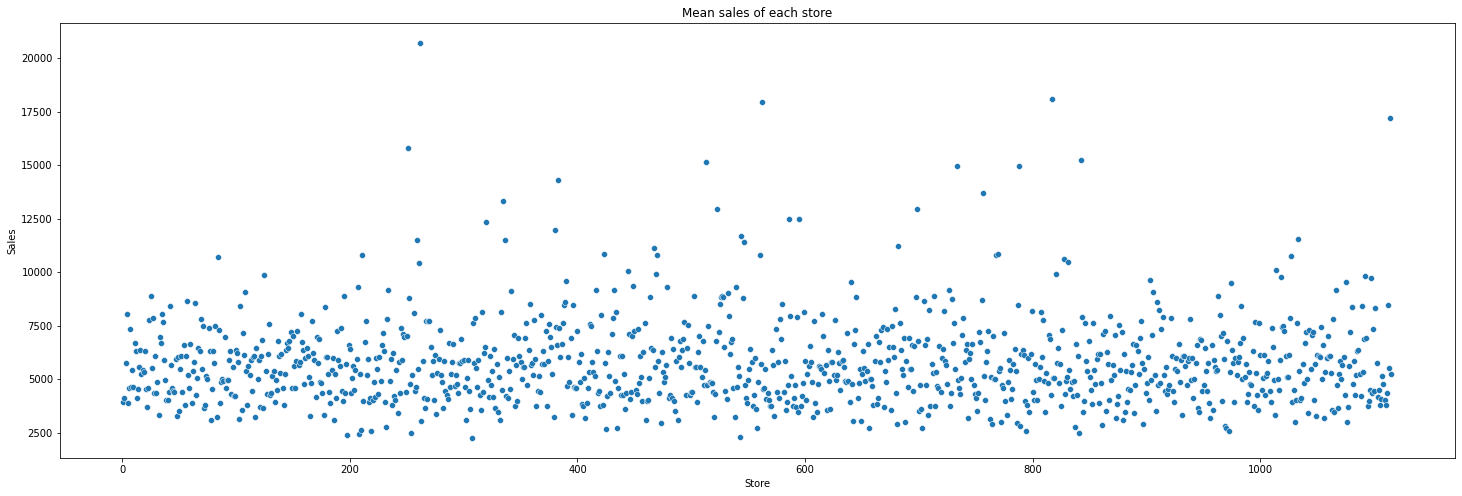

In [141]:
plt.figure(figsize=(25,8))
mean_sales = train.groupby('Store')['Sales'].mean().reset_index()
sns.scatterplot(data=mean_sales, x='Store', y='Sales')
plt.title('Mean sales of each store')
plt.show()

### Customers Field

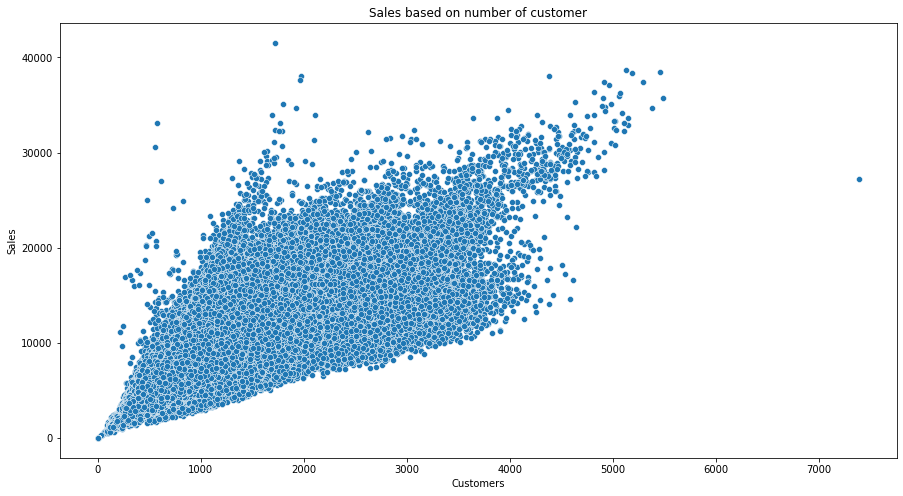

In [142]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Customers', y='Sales', data = train)
plt.title('Sales based on number of customer')
plt.show()

### Date Field 

In [143]:
train['Date'] = pd.to_datetime(train['Date'])
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Day']=train['Date'].dt.day

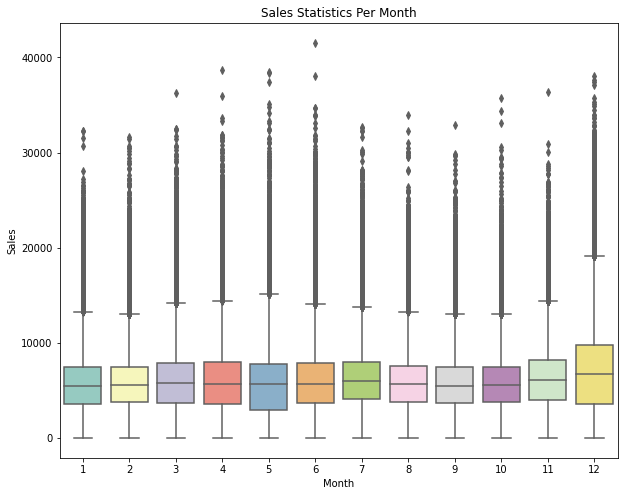

In [144]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='Month',data=train,palette='Set3')
plt.title('Sales Statistics Per Month')
plt.show()

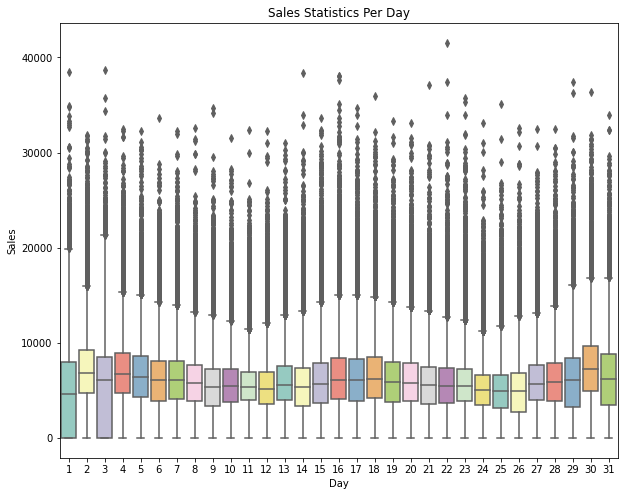

In [145]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='Day',data=train,palette='Set3')
plt.title('Sales Statistics Per Day')
plt.show()

### Open Field

In [146]:
print('Number of opened(1) and closed(0) stores : \n', train['Open'].value_counts())

Number of opened(1) and closed(0) stores : 
 1    844392
0    172817
Name: Open, dtype: int64


In [147]:
print('Number of opened stores ', len(train[train['Open']==1]))
print('Number of closed stores ', len(train[train['Open']==0]))

Number of opened stores  844392
Number of closed stores  172817


In [148]:
print('Closed stores having 0 sales : ', len(train[(train['Sales']<=0) & (train['Open']==0) ]))

Closed stores having 0 sales :  172817


If the shop is closed and the sales are equal to 0 we should drop that value : it s irrelevent to our futur prediction 

In [149]:
train=train[(train['Sales']>0) | (train['Open']==1)]
print('New training dataset shape',train.shape)

New training dataset shape (844392, 12)


In [150]:
print('Number of opened stores ', len(train[train['Open']==1]))
print('Number of closed stores ', len(train[train['Open']==0]))

Number of opened stores  844392
Number of closed stores  0


▶ We should drop this feature

In [151]:
train=train.drop(columns=['Open'])

### StateHoliday Field

In [152]:
print(train['StateHoliday'].unique())

['0' 'a' 'b' 'c' 0]


In [153]:
print('Number of opened stores during holidays : \na = public holiday, b = Easter holiday, c = Christmas, 0 = None')
print( train['StateHoliday'].value_counts())

Number of opened stores during holidays : 
a = public holiday, b = Easter holiday, c = Christmas, 0 = None
0    731342
0    112140
a       694
b       145
c        71
Name: StateHoliday, dtype: int64


In [154]:
print( len(train[train['StateHoliday']==0]))
print( len(train[train['StateHoliday']=='0']))


112140
731342


▶ there are two value that should be merged 

In [155]:
train.loc[train['StateHoliday'] == 0, 'StateHoliday'] = '0'

In [156]:
print('Number of opened stores during holidays : \na = public holiday, b = Easter holiday, c = Christmas, 0 = None')
print( train['StateHoliday'].value_counts())

Number of opened stores during holidays : 
a = public holiday, b = Easter holiday, c = Christmas, 0 = None
0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64


In [157]:
train['StateHoliday'] = train['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})


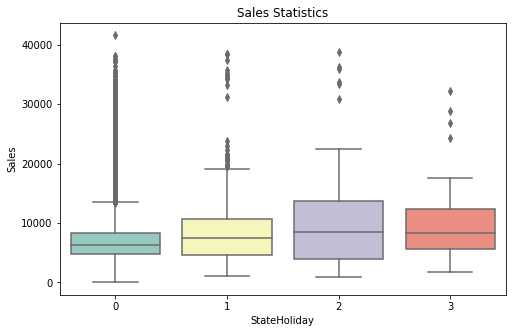

In [158]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Sales',x='StateHoliday',data=train,order=[0,1,2,3],palette='Set3')
plt.title('Sales Statistics')
plt.show()

### DayofWeek Field


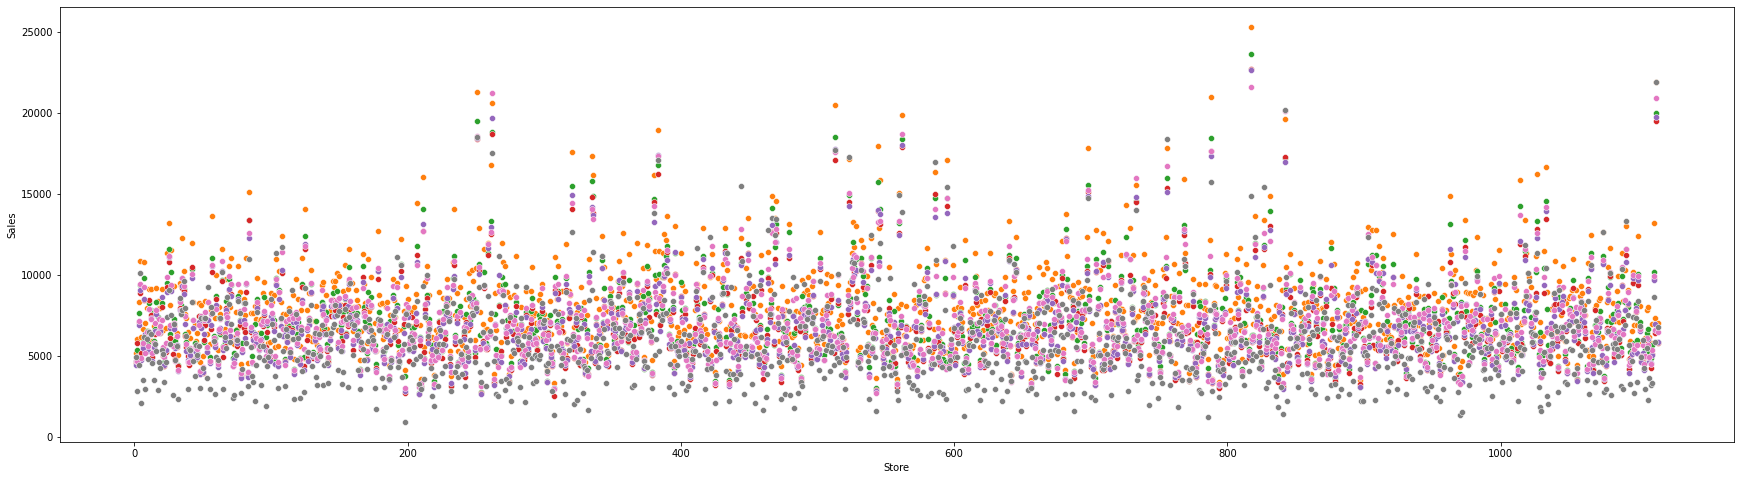

In [159]:
plt.figure(figsize=(30,8))
colors_dict = {
    'blue': '#1f77b4',
    'orange': '#ff7f0e',
    'green': '#2ca02c',
    'red': '#d62728',
    'purple': '#9467bd',
    'pink': '#e377c2',
    'gray': '#7f7f7f',
    'black':'#000000'
}
colors = list(colors_dict.values()) 

for i in range(0,7):
  filtered_i=train[train['DayOfWeek']==i]
  mean_sales_i = filtered_i.groupby('Store')['Sales'].mean().reset_index()
  sns.scatterplot(data=mean_sales_i, x='Store', y='Sales', color=colors[i])

plt.show()

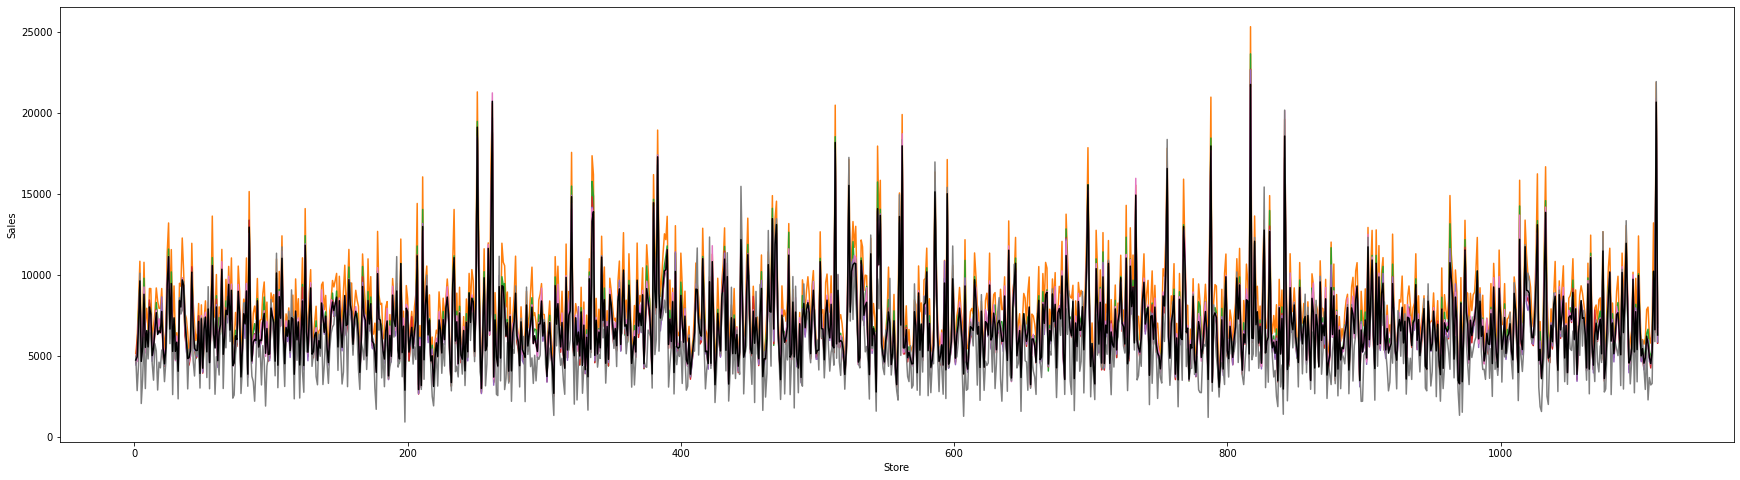

In [160]:
plt.figure(figsize=(30,8))
colors_dict = {
    'blue': '#1f77b4',
    'orange': '#ff7f0e',
    'green': '#2ca02c',
    'red': '#d62728',
    'purple': '#9467bd',
    'pink': '#e377c2',
    'gray': '#7f7f7f',
    'black':'#000000'
}
colors = list(colors_dict.values()) 

for i in range(0,7):
  filtered_i=train[train['DayOfWeek']==i]
  mean_sales_i = filtered_i.groupby('Store')['Sales'].mean().reset_index()
  sns.lineplot(data=mean_sales_i, x='Store', y='Sales', color=colors[i])

mean_sales = train.groupby('Store')['Sales'].mean().reset_index()
sns.lineplot(data=mean_sales, x='Store', y='Sales', color=colors[-1])

plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

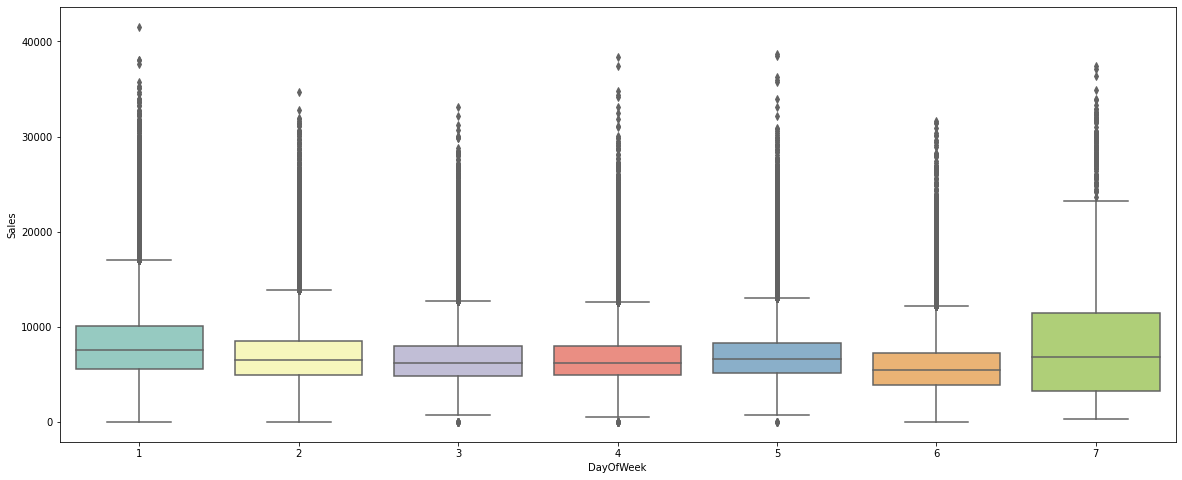

In [161]:
plt.figure(figsize=(20,8))
sns.boxplot(y='Sales',x='DayOfWeek',data=train,palette='Set3')

In [162]:
print(train['DayOfWeek'].value_counts())

6    144058
2    143961
3    141936
5    138640
1    137560
4    134644
7      3593
Name: DayOfWeek, dtype: int64


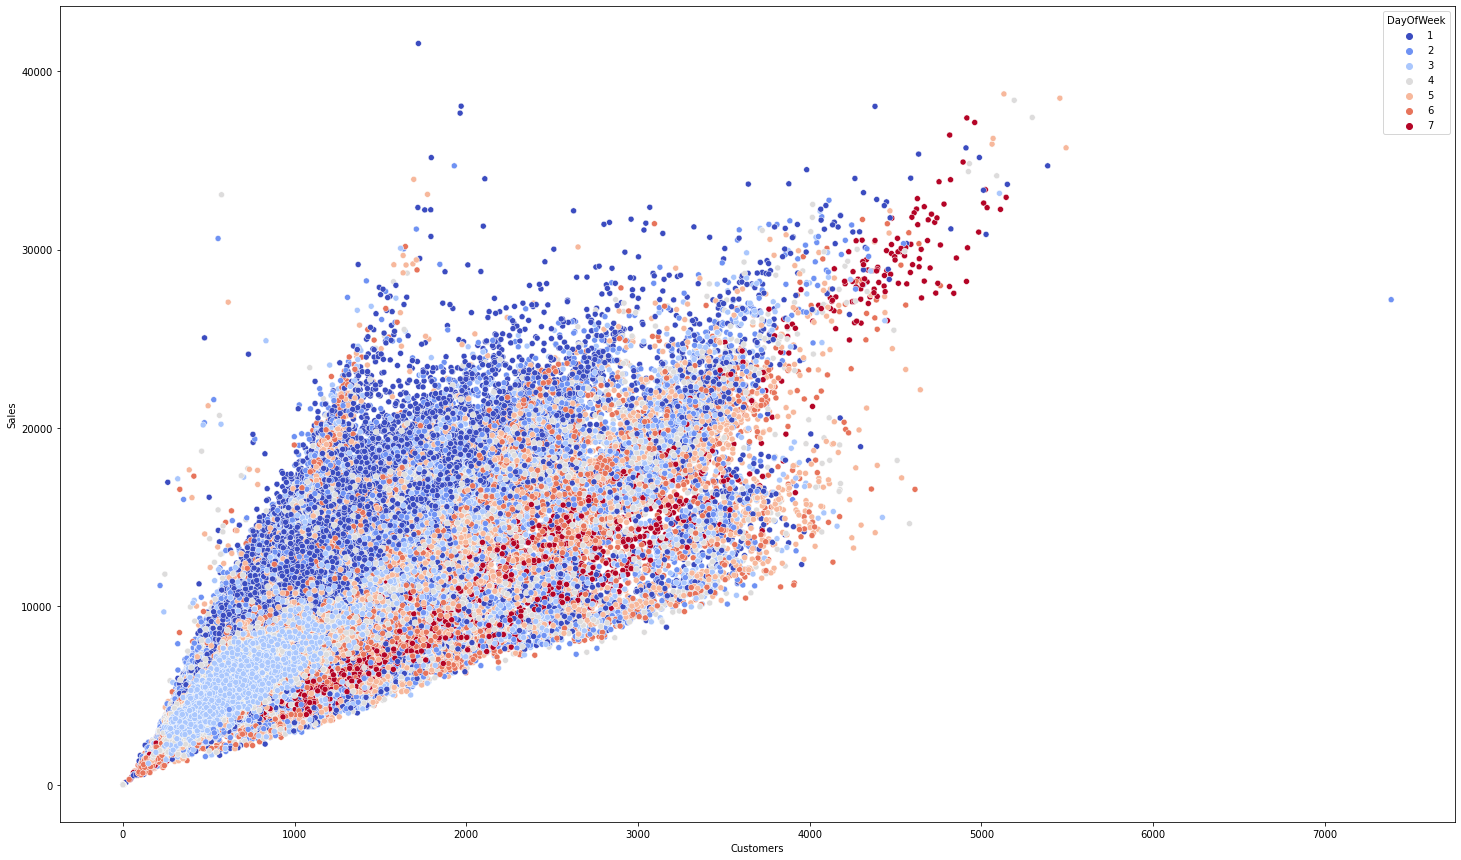

In [163]:
plt.figure(figsize=(25,15))
sns.scatterplot(x='Customers',y='Sales',data=train,hue='DayOfWeek',palette='coolwarm')
plt.show()

### SchoolHoliday Field

In [164]:
train['SchoolHoliday'].value_counts()

0    680935
1    163457
Name: SchoolHoliday, dtype: int64

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='Customers',y='Sales',data=train,hue='SchoolHoliday')

<Axes: xlabel='Customers', ylabel='Sales'>

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train, x='SchoolHoliday', y='Sales')

### Promo Field

In [ ]:
train['Promo'].value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=train, x='Promo', y='Sales')

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Customers',y='Sales',data=train,hue='Promo',palette='plasma')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Sales',x='Promo',data=train,palette='Set3')
plt.show()

### HeatMap

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(train.corr(), cmap='coolwarm')
plt.show()

# Feature Engineering

▶ We will add a feature SalesPerCustomer ( sales/ customers )

In [ ]:
train['SalesPerCustomer']=train['Sales']/train['Customers']
train['SalesPerCustomer']


In [ ]:
null_counts = train.isnull().sum()
for index, value in null_counts.iteritems():
    if value > 0:
        print(f"There are {value} NaN values in feature '{index}'.")

In [ ]:
train.fillna(0, inplace=True)

In [ ]:
train=train.drop(columns=['Year','Date','Store'])

In [ ]:
train.hist(figsize=(25,25))
plt.show()

▶ We should drop customers and sales per customers because they don t exist in the test set

In [ ]:
train=train.drop(columns=['Customers','SalesPerCustomer'])

In [ ]:
X = train.drop('Sales', axis=1)
y=train['Sales']

# Building the ML Model : Random Forest

In [ ]:
X.head(5)

In [ ]:
y.head(5)

### Create the model 

In [ ]:
# Spliting dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor(n_estimators=100,
                          criterion='squared_error',
                          max_features='auto',
                          oob_score=True,
                          n_jobs=-1,
                          verbose=1,
                          random_state=101)

In [ ]:
rfr.fit(X_train,y_train)

### Test The Model

In [ ]:
# Prediction
predict=rfr.predict(X_test)
print(predict)

In [ ]:
# Root mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(y_test,predict)
print('Root Mean Square Error {}'.format(sqrt(mse)))

In [ ]:
# Import attributes according to model

important_features=pd.DataFrame(rfr.feature_importances_,index=X_train.columns)
important_features.sort_values(by=0,ascending=False)

In [ ]:
prediction=pd.DataFrame(y_test)
prediction['Sales_prediction']=predict
prediction.rename(columns={'Log_Sales':'Sales'},inplace=True)

plt.figure(figsize=(8,8))
sns.scatterplot(x='Sales',y='Sales_prediction',data=prediction)
plt.title('Actual vs Prediction of Sales',fontdict={'fontsize':20})
plt.show()

# Final Prediction on the Testset


In [ ]:
X_train.head(5)

In [ ]:
test.info()

In [ ]:
print("Day of Week :",test['DayOfWeek'].unique())
print("Promo : ", test['Promo'].unique())
print("StateHoliday : ", test['StateHoliday'].unique())

In [ ]:
test['Date'] = pd.to_datetime(test['Date'])
test['Year']=test['Date'].dt.year
test['Month']=test['Date'].dt.month
test['Day']=test['Date'].dt.day
test= test.drop(columns=['Id','Store','Open','Date','Year'])
test['StateHoliday'] = test['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})


In [ ]:
print("Day of Week :",test['DayOfWeek'].unique())
print("Promo : ", test['Promo'].unique())
print("StateHoliday : ", test['StateHoliday'].unique())

In [ ]:
test.head(5)

In [ ]:
Sales=rfr.predict(test)
Sales